In [211]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [212]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [213]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder=OneHotEncoder()

In [214]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [215]:
ids=test["Id"].astype(int)


In [216]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [217]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

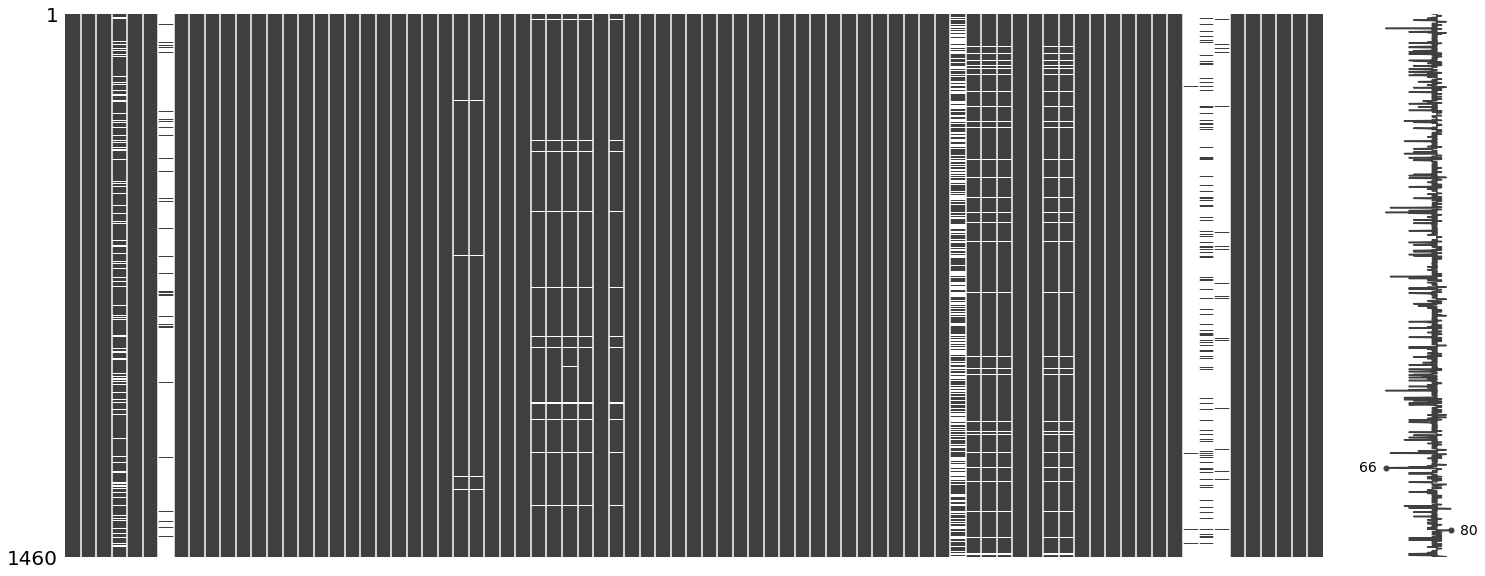

In [218]:
# msno shows missing values 
# each white vertical line represent a missing value in curresponding coloumn
import missingno as msno
msno.matrix(train)


In [219]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [222]:
# train.head

In [223]:
# msno.matrix(train,labels=True)

In [224]:
y=train["SalePrice"]

In [225]:
train.drop("SalePrice", inplace=True, axis=1)

In [226]:
# train.dtypes

In [227]:
# test.dtypes

In [228]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 80)


In [230]:
# train['MasVnrType']

In [231]:
train.drop('Id', inplace=True, axis=1)
test.drop('Id', inplace=True, axis=1)

In [232]:
print(train.shape)
print(test.shape)

(1460, 79)
(1459, 79)


In [236]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [237]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


pd.get_dummies

It generates one_hot encoding of a column

In [240]:
encoded_train=pd.get_dummies(train)

In [241]:
encoded_test=pd.get_dummies(test)

In [242]:
encoded_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [243]:
print(encoded_train.shape)
print(encoded_test.shape)

(1460, 288)
(1459, 270)


In [244]:
# msno.matrix(encoded_test)


In [245]:
# encoded_test.dtypes

In [246]:
# encoded_train.shape

In [247]:

#Shows Coulmns Difference in two Dfs
encoded_train.columns.difference(encoded_test.columns)


Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Utilities_NoSeWa'],
      dtype='object')

In [248]:
encoded_train.drop(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Utilities_NoSeWa'], inplace=True, axis=1)

In [249]:
# encoded_train.drop('Id', inplace=True, axis=1)
# ids=encoded_test.drop('Id', inplace=True, axis=1)

In [250]:
# encoded_test

In [251]:
print(encoded_train.shape)
print(encoded_test.shape)



(1460, 270)
(1459, 270)


In [252]:
encoded_test.columns.difference(encoded_train.columns)


Index([], dtype='object')

In [254]:
print(encoded_train.shape)
print(encoded_test.shape)

(1460, 270)
(1459, 270)


In [255]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [263]:
# train.fillna(0)

# train= train.astype(float)

In [264]:
encoded_train.isna().values.any()


True

In [265]:
train_nan_cols = [i for i in encoded_train.columns if encoded_train[i].isnull().any()]
train_nan_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [266]:
encoded_train.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], inplace=True,axis=1 )

In [267]:
encoded_test.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], inplace=True,axis=1 )

In [269]:
print(encoded_train.shape)
print(encoded_test.shape)

(1460, 267)
(1459, 267)


In [270]:
encoded_test.isnull().values.any()

True

In [271]:
test_nan_cols = [i for i in encoded_test.columns if encoded_test[i].isnull().any()]
test_nan_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [272]:
encoded_train.drop(['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea'], inplace=True, axis=1)
                   

In [273]:
encoded_test.drop(['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea'], inplace=True, axis=1)
                   

In [274]:
# encoded_train.fillna(0)
# encoded_train=encoded_train.astype(int)
# encoded_test.fillna(0)
# encoded_test=encoded_test.astype(int)

In [275]:
# from sklearn.neural_network import MLPRegressor
# regr = MLPRegressor(random_state=1, max_iter=500).fit(encoded_train, y)


In [276]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.5,random_state=1, max_iter=500).fit(encoded_train, y)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852309521528.5565, tolerance: 920791133.4609977
  positive)


In [277]:
# encoded_test.fillna(0)

# encoded_test= train.astype(float)

In [278]:
# encoded_test.drop(['LotFrontage'], inplace=True,axis=1 )

In [279]:
# encoded_test.isnull().sum()


In [ ]:
# encoded_train.dtypes

In [ ]:
# encoded_test.drop(['LotFrontage'], inplace=True,axis=1 )

In [ ]:
# encoded_test.shape

In [280]:
pred=regr.predict(encoded_test)

In [281]:
submision=pd.DataFrame(pred, columns=['SalePrice'])

In [282]:
submision

,SalePrice
0,116192.116900
1,152864.672984
2,184858.186464
3,212379.993729
4,194671.013160
...,...
1454,81457.681895
1455,76039.197120
1456,165941.977147
1457,130149.527793


In [283]:
res=pd.concat([ids, submision], axis=1)


In [284]:
res

,Id,SalePrice
0,1461,116192.116900
1,1462,152864.672984
2,1463,184858.186464
3,1464,212379.993729
4,1465,194671.013160
...,...,...
1454,2915,81457.681895
1455,2916,76039.197120
1456,2917,165941.977147
1457,2918,130149.527793


In [ ]:
# res=res.drop(1459, axis=0)

In [ ]:
res

In [ ]:
res.isnull().sum()


In [ ]:
res['Id']=res['Id'].astype(int)

In [ ]:
res

In [285]:
sub = res.to_csv('submissions.csv', index=False)